In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DF = pd.read_excel("PQM Dataset.xlsx", sheet_name = "RMS_1hr")

In [4]:
print("Data Shape:", DF.shape)
print("\nFirst few rows:\n", DF.head())
print("\n")
print("\nBasic info:\n", DF.info())
print("\nDescriptive statistics:\n", DF.describe())
print("\nNumber of missing values in each column:\n", DF.isnull().sum())

Data Shape: (6005, 52)

First few rows:
    TimeID     Col_1     Col_2     Col_3     Col_4     Col_5     Col_6  \
0       1  1577.581  1461.414  1617.029  156.8840  131.5002  157.8388   
1       2  1578.375  1410.741  1623.837  157.6020  131.5002  157.8388   
2       3  1577.967  1542.785  1618.742  157.3712  131.5002  157.8388   
3       4  1581.924  1456.884  1618.571  157.8388  157.8388  157.8388   
4       5  1583.465  1544.799  1625.391  156.6342  131.5002  157.8388   

      Col_7     Col_8     Col_9  ...    Col_42  Col_43    Col_44    Col_45  \
0  174.3484  105.2259  233.7339  ...  7.327925     0.0  8.914844  0.288364   
1  170.9528  105.2259  233.7339  ...  7.243339     0.0  0.000000  0.000000   
2  171.5963  105.2259  233.7339  ...  7.094057     0.0  0.000000  0.000000   
3  173.8632  105.2259  245.2912  ...  7.328974     0.0  0.000000  0.000000   
4  173.8132  105.2259  239.6246  ...  7.375771     0.0  0.000000  0.000000   

   Col_46    Col_47    Col_48    Col_49    Col_50  

In [5]:
DF_first13 = DF.iloc[:,:13]
cleanDF = DF_first13.fillna(DF.mean())
#cleanDF = DF_first13.fillna(0)

In [6]:
def find_mean(data):
    mean = np.mean(data)
    return mean

def find_median(data):
    median = np.median(data)
    return median

def find_std_dev(data):
    std_dev = np.std(data)
    return std_dev

Statistics for each column:


Column: Col_1
Mean: 3003.0000
Median: 3003.0000
Standard Deviation: 1733.4942


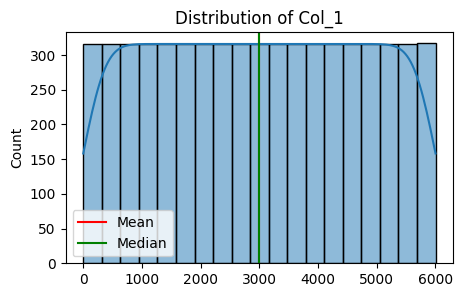


Column: Col_2
Mean: 73683.0157
Median: 78439.1600
Standard Deviation: 18737.3159


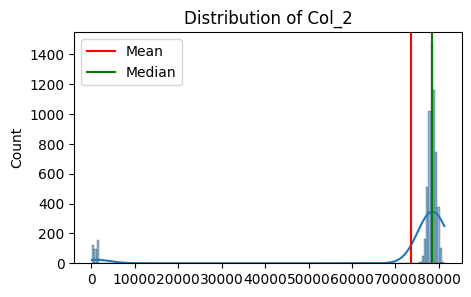


Column: Col_3
Mean: 73005.9819
Median: 77883.5200
Standard Deviation: 18718.8160


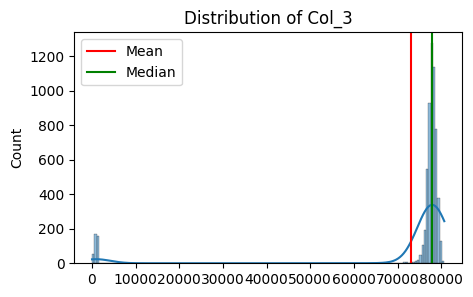


Column: Col_4
Mean: 74128.6016
Median: 78883.8600
Standard Deviation: 18818.6124


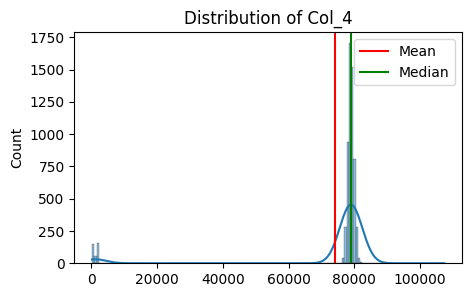


Column: Col_5
Mean: 77013.5307
Median: 79024.7300
Standard Deviation: 12683.4590


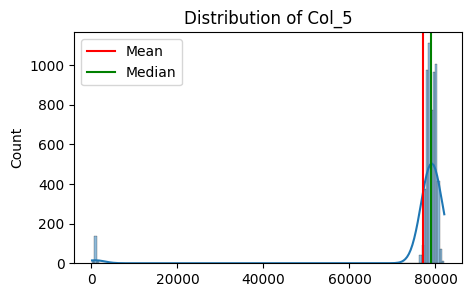


Column: Col_6
Mean: 76303.7490
Median: 78451.3400
Standard Deviation: 12800.5772


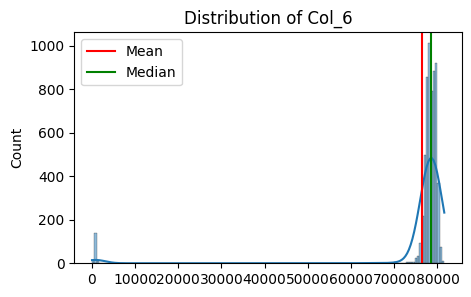


Column: Col_7
Mean: 77455.7975
Median: 79460.9500
Standard Deviation: 12753.8799


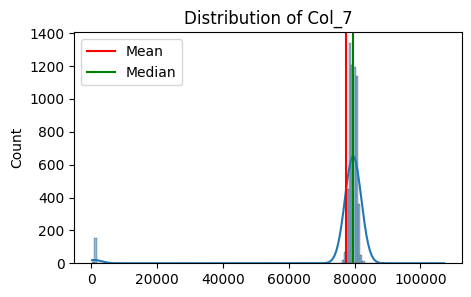


Column: Col_8
Mean: 76399.5372
Median: 78466.7000
Standard Deviation: 12565.9114


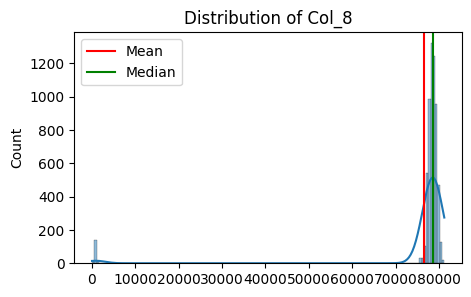


Column: Col_9
Mean: 75710.9191
Median: 77918.6300
Standard Deviation: 12684.4089


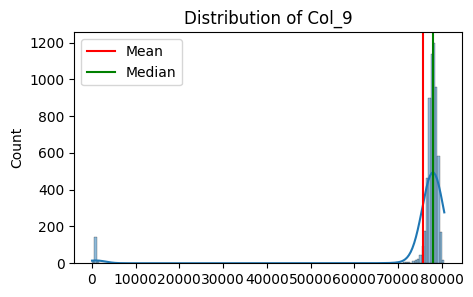


Column: Col_10
Mean: 76839.4990
Median: 78900.8100
Standard Deviation: 12636.1655


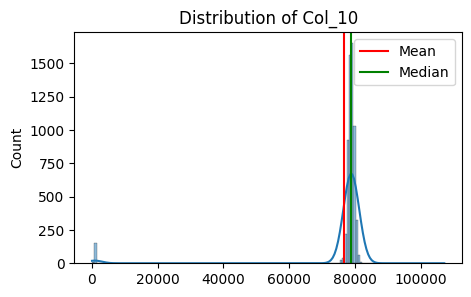


Column: Col_11
Mean: 129724.2709
Median: 135346.7000
Standard Deviation: 24038.9893


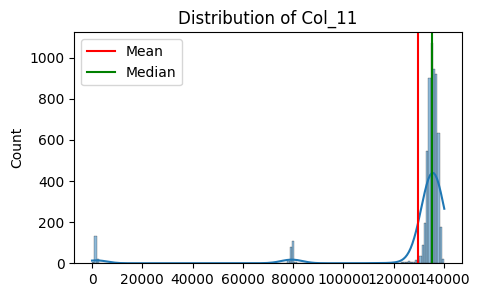


Column: Col_12
Mean: 131789.8984
Median: 137185.7000
Standard Deviation: 24027.6099


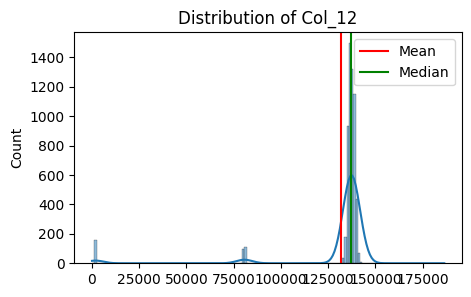

In [7]:
# calculating statistics for each column
print("Statistics for each column:\n")

cols = [col for col in cleanDF.columns if col != 'TimeID']

for i, column in enumerate(cols):
    data = cleanDF.iloc[:, i].values
    
    print(f"\nColumn: {column}")
    print(f"Mean: {find_mean(data):.4f}")
    print(f"Median: {find_median(data):.4f}")
    print(f"Standard Deviation: {find_std_dev(data):.4f}")

    plt.figure(figsize=(5, 3))
    sns.histplot(data, kde=True)
    plt.axvline(find_mean(data), color='red', label='Mean')
    plt.axvline(find_median(data), color='green', label='Median')
    plt.legend()
    plt.title(f"Distribution of {column}")
    plt.show()
    


Outliers for each column (Z-score > 3):


Column: Col_1
Number of outliers: 374


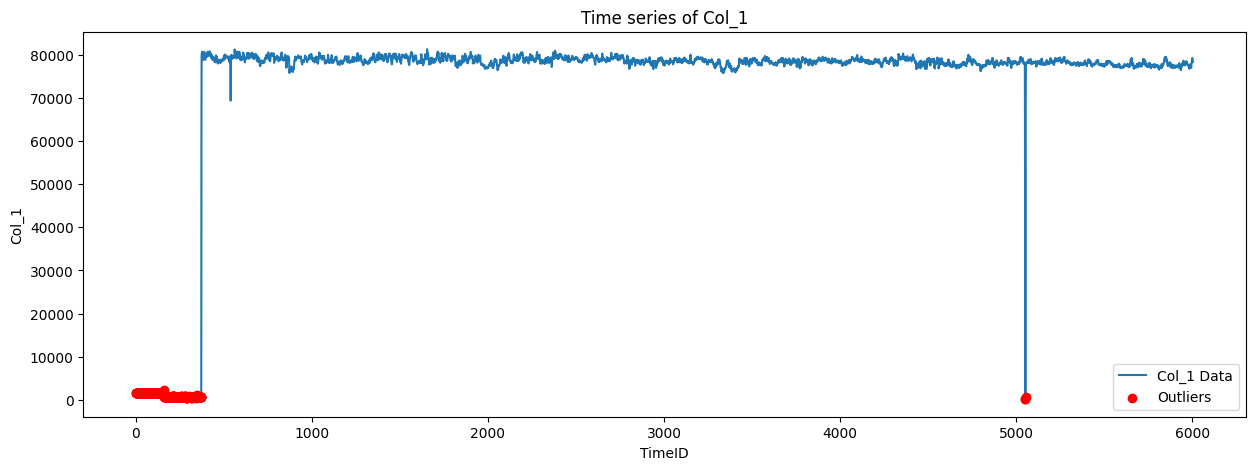


Column: Col_2
Number of outliers: 378


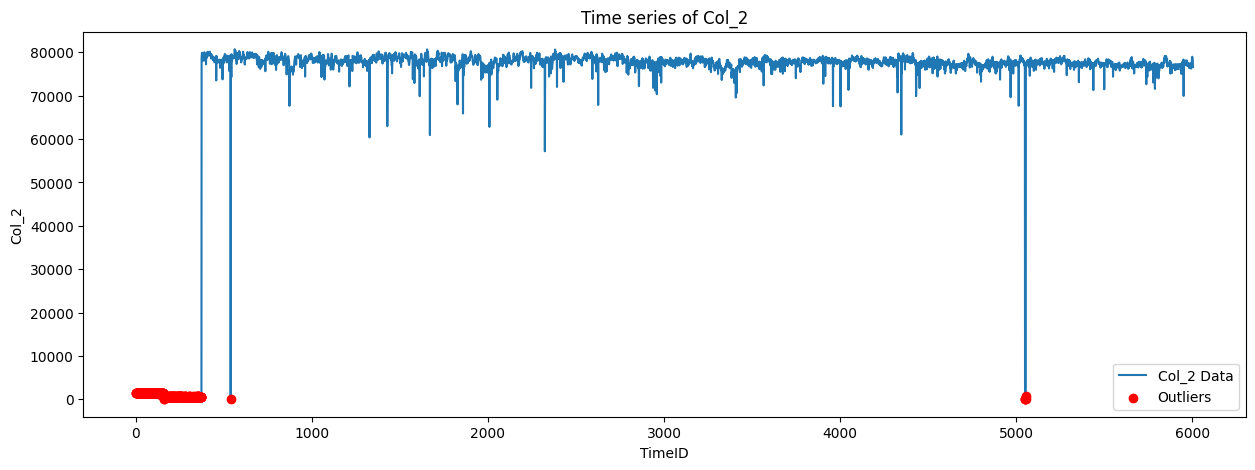


Column: Col_3
Number of outliers: 374


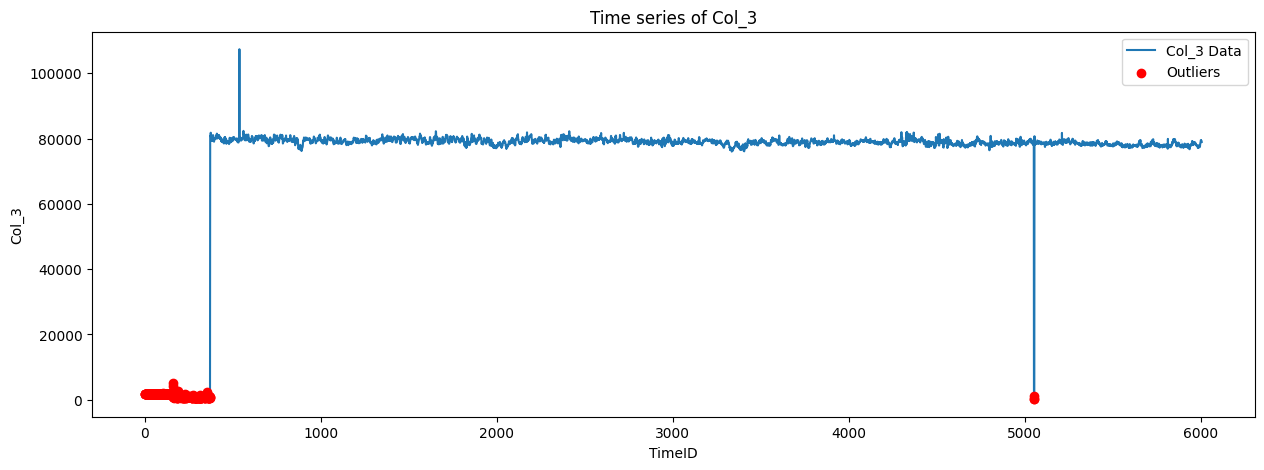


Column: Col_4
Number of outliers: 161


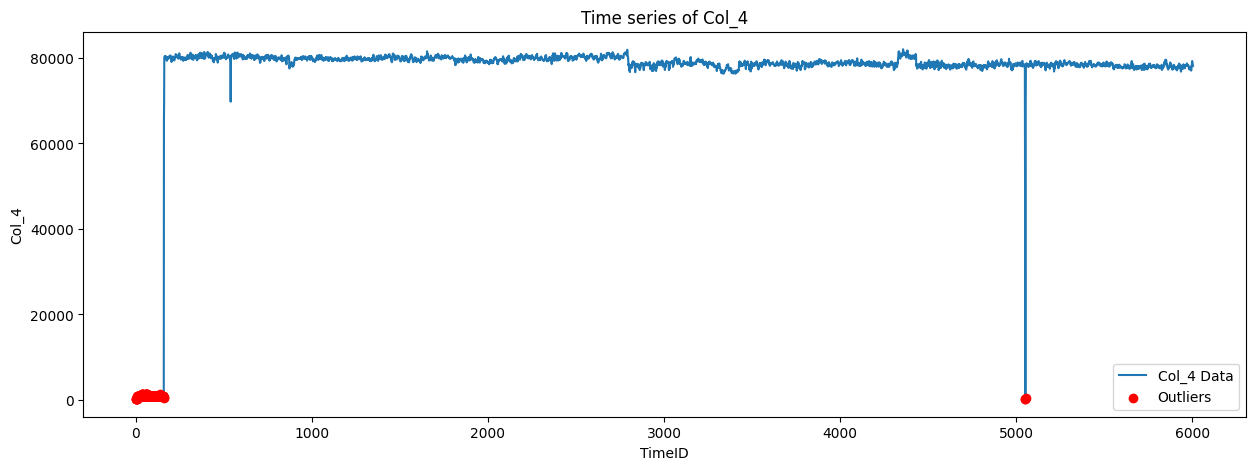


Column: Col_5
Number of outliers: 166


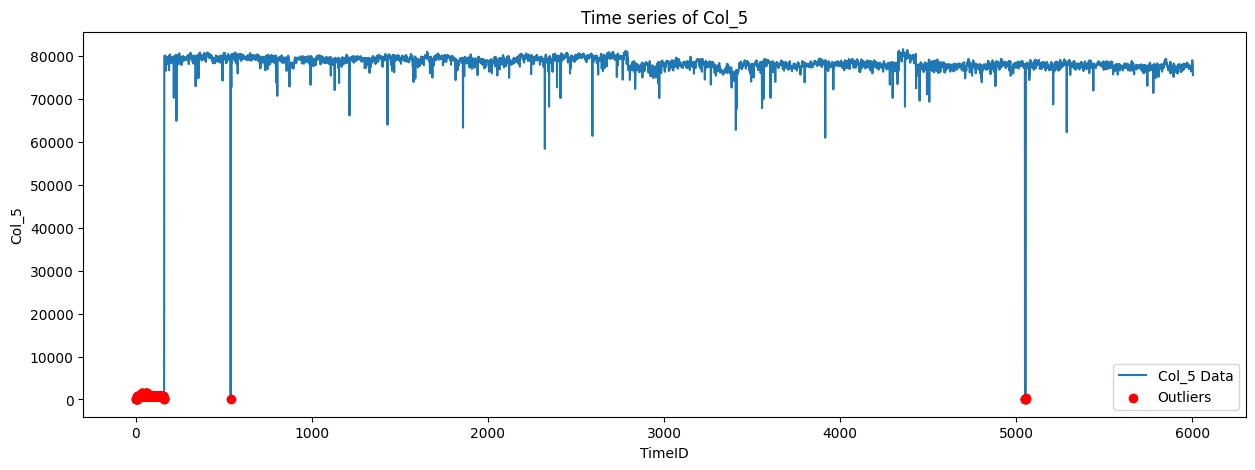


Column: Col_6
Number of outliers: 161


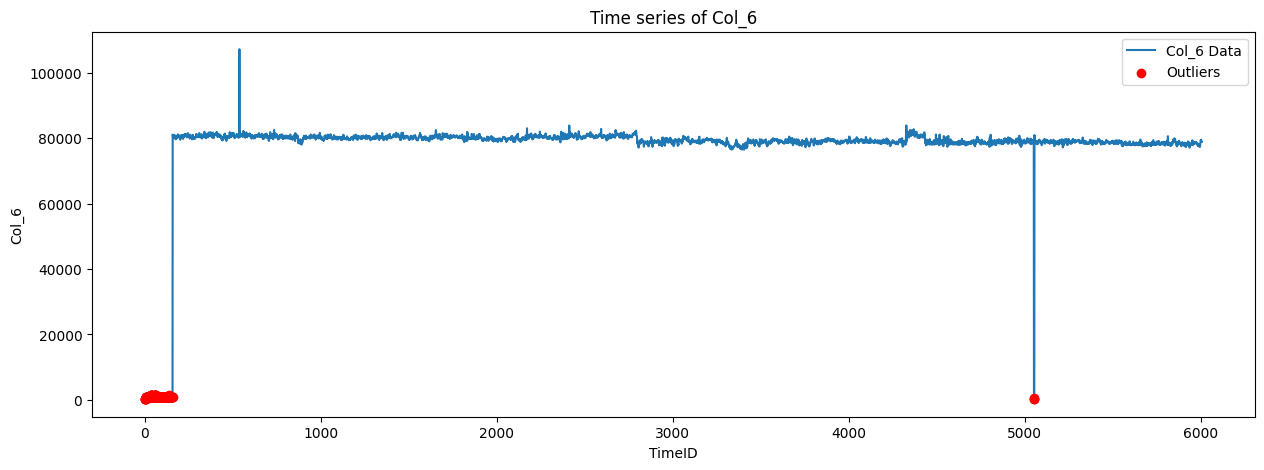


Column: Col_7
Number of outliers: 161


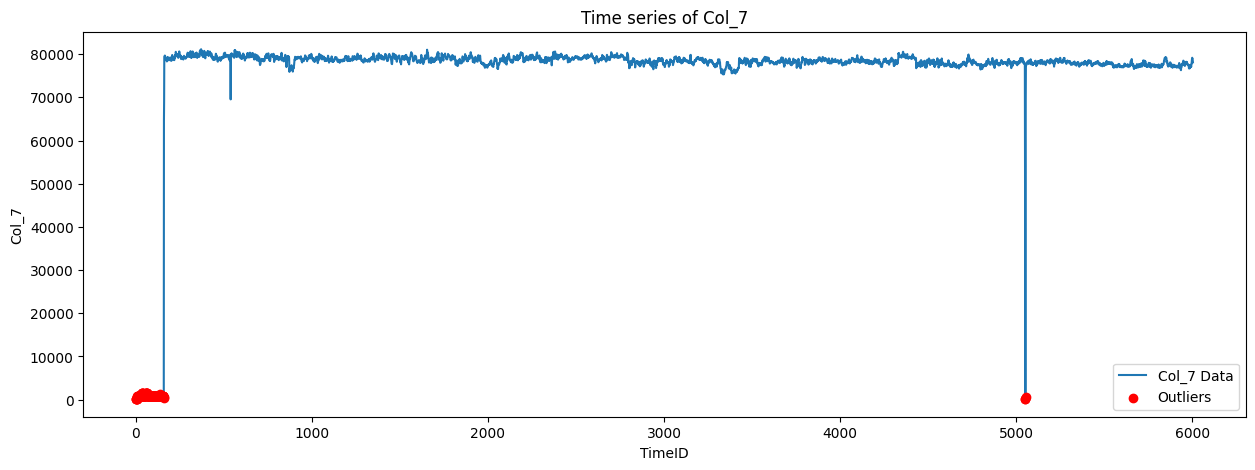


Column: Col_8
Number of outliers: 166


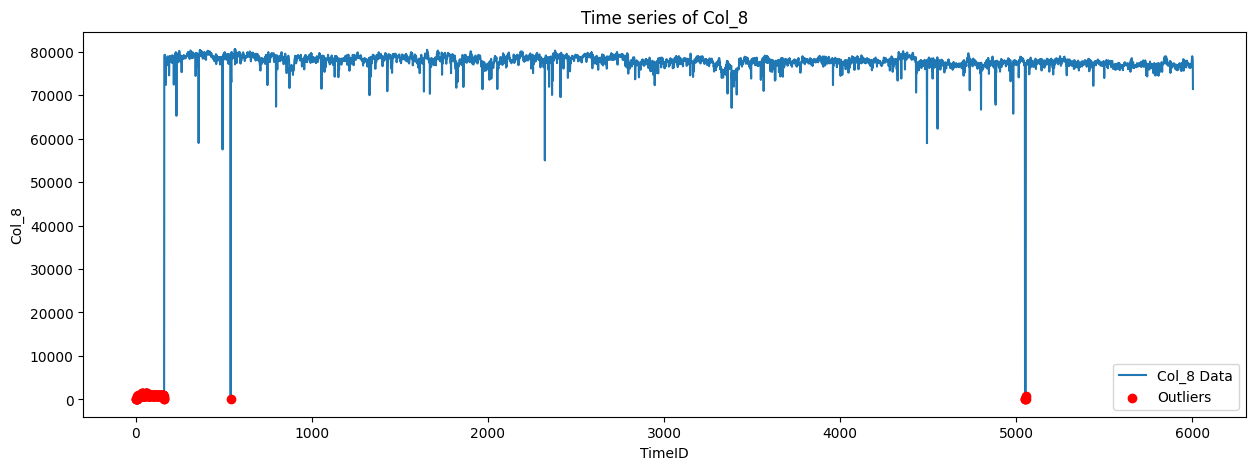


Column: Col_9
Number of outliers: 161


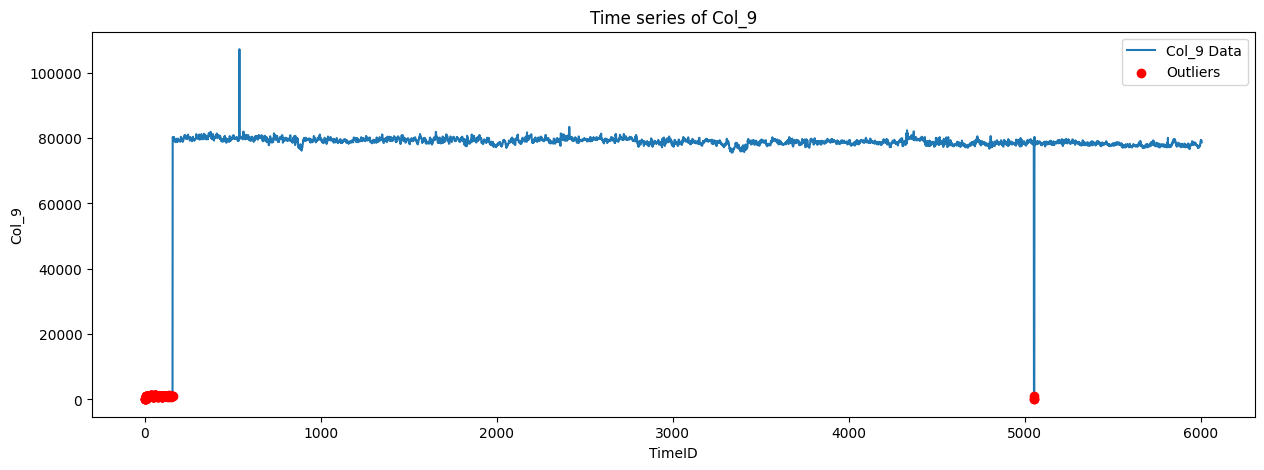


Column: Col_10
Number of outliers: 166


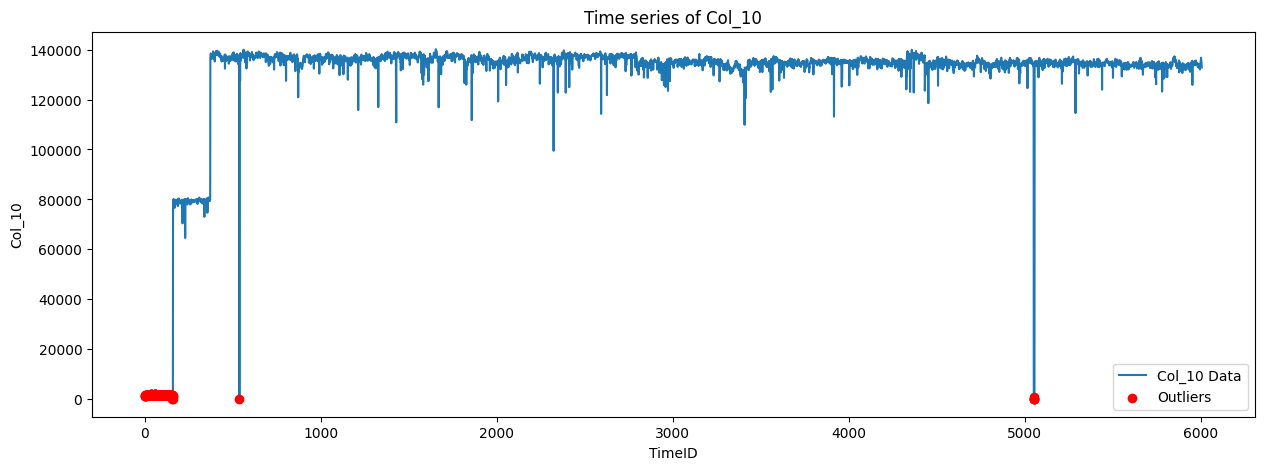


Column: Col_11
Number of outliers: 161


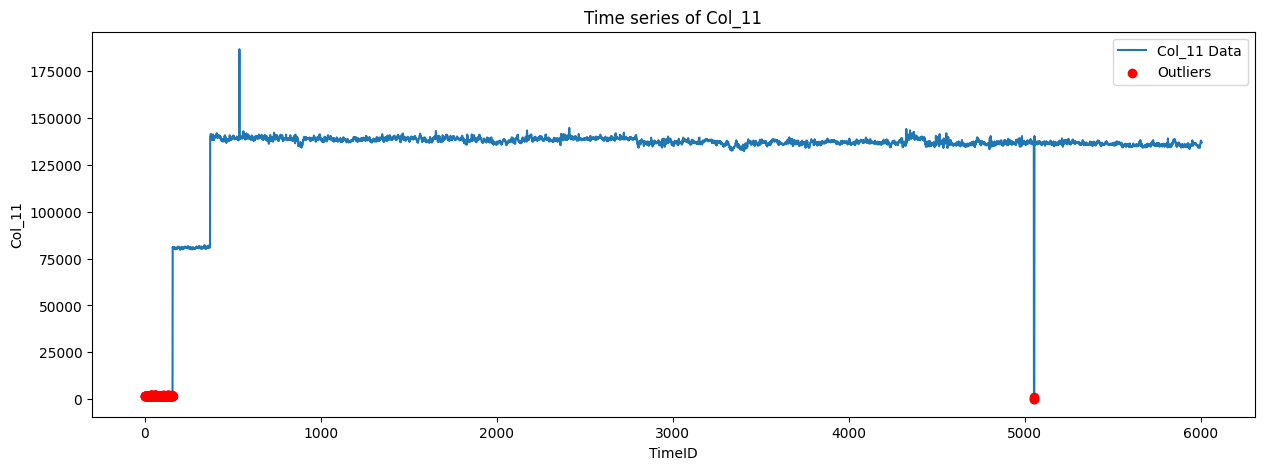


Column: Col_12
Number of outliers: 161


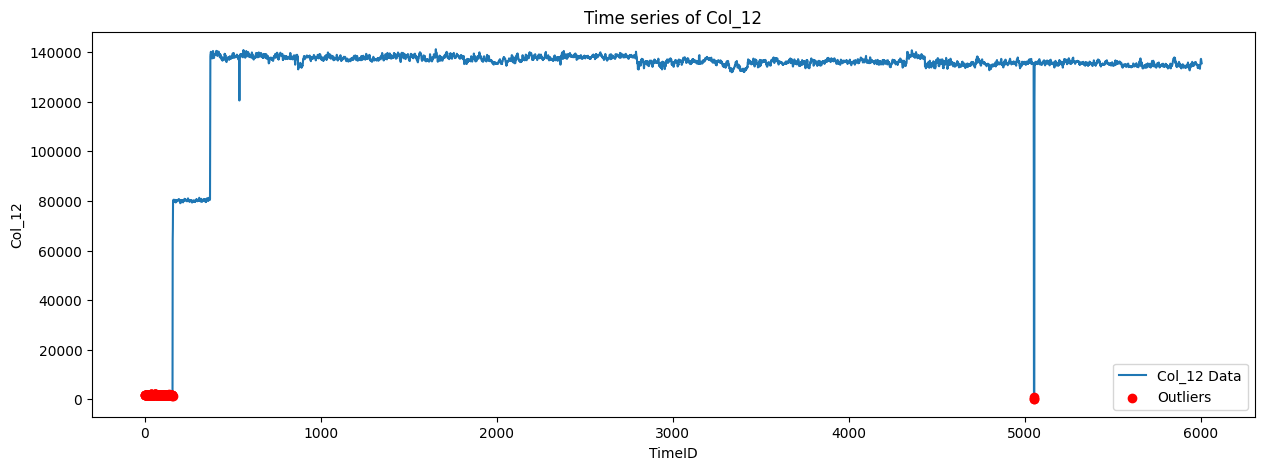

In [10]:
# calculating outliers using Z-scoring
print("\nOutliers for each column (Z-score > 3):\n")

columns = [col for col in cleanDF.columns if col != 'TimeID']
time_data = cleanDF['TimeID'].values

for column in columns:
    feature_data = cleanDF[column].values
    
    mean = find_mean(feature_data)
    std_dev = find_std_dev(feature_data)
    
    z_scores = (feature_data - mean) / std_dev
    outliers = np.abs(z_scores) > 3
    
    print(f"\nColumn: {column}")
    print(f"Number of outliers: {np.sum(outliers)}")
    
    plt.figure(figsize=(15, 5))
    plt.plot(time_data, feature_data, label = f'{column} Data')
    plt.scatter(time_data[outliers], feature_data[outliers], color='red', label= 'Outliers', zorder = 5)
    plt.title(f"Time series of {column}")
    plt.xlabel("TimeID")
    plt.ylabel(column)
    plt.legend()
    plt.show()